<a href="https://colab.research.google.com/github/Thorne-Musau/Internsavy2/blob/main/Graduate_Admissions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls 'drive/My Drive/Dataset/Admission_Predict.csv'

'drive/My Drive/Dataset/Admission_Predict.csv'


In [20]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#Importing Datasets
%time dataset = pd.read_csv('drive/My Drive/Dataset/Admission_Predict.csv')
%time dataset = pd.read_csv('drive/My Drive/Dataset/Admission_Predict_Ver1.1.csv')
df = dataset.copy()

CPU times: user 4.05 ms, sys: 129 µs, total: 4.18 ms
Wall time: 5.57 ms
CPU times: user 3.99 ms, sys: 0 ns, total: 3.99 ms
Wall time: 9.16 ms


In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
#Info on Dataset
df.isnull().sum()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
x = df.iloc[:, 1:8]
y = df.iloc[:, 8]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [9]:
#SVR
from sklearn import svm
clf = svm.SVR(gamma='auto')
clf.fit(x_train, y_train)
label=[]
accuracy=[]
label.append('SVR')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.4684643469178015


In [10]:
from sklearn import linear_model
clf = linear_model.Ridge(alpha=.5)
clf.fit(x_train, y_train)
label.append('Ridge')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.7904448931046318


In [11]:
clf = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3)
clf.fit(x_train, y_train)
label.append('RidgeCV')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.7902675115796745


In [12]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train, y_train)
label.append('Lasso')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.6348626278099136


In [13]:
clf = linear_model.BayesianRidge()
clf.fit(x_train, y_train)
label.append('BayesianRidge')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.7898388391126454


In [14]:
clf = linear_model.ARDRegression()
clf.fit(x_train, y_train)
label.append('ARDRegression')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.7781016275223791


In [15]:
clf = linear_model.TheilSenRegressor()
clf.fit(x_train, y_train)
label.append('TheilSenRegressor')
accuracy.append(clf.score(x_test, y_test))
print(clf.score(x_test, y_test))

0.790931944229245


In [16]:
clf.predict(x_test[10:20])

array([0.73130599, 0.66362077, 0.73786538, 0.94073694, 0.6278948 ,
       0.89229585, 0.87105074, 0.54339395, 0.95839592, 0.63767804])

In [17]:
y_test[15:25]

83     0.92
443    0.87
455    0.59
384    0.96
137    0.71
254    0.85
351    0.73
434    0.64
312    0.78
222    0.76
Name: Chance of Admit , dtype: float64

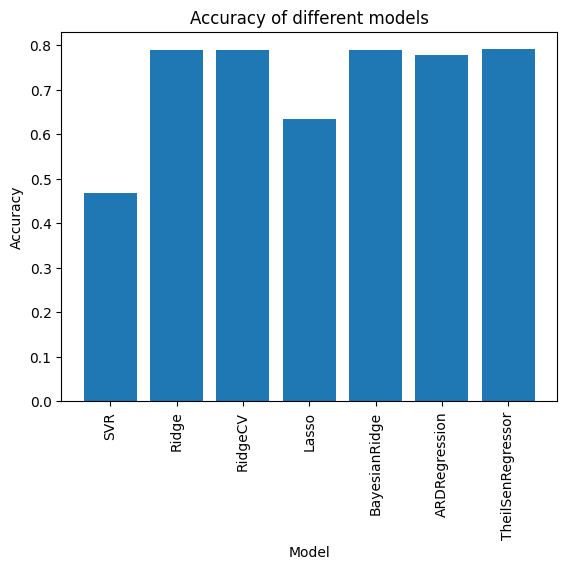

In [23]:
#Plotting var
index = np.arange(len(label))
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, accuracy)
    plt.xlabel('Model', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=90)
    plt.title('Accuracy of different models')
    plt.savefig("model_accuracy.png")
    plt.show()
plot_bar_x()